Statistic analysis to start comparation betweens two similars clubs. First of all, we obtain the correct path to the respective experiments.   

In [170]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

In [171]:
#Define path to the experiments
Barcelona = "../Data/FCBarcelona/ThirdStage/finalMetadataBarcelona.csv"
Arsenal = "../Data/ArsenalFC/ThirdStage/finalMetadataArsenal.csv"

In [172]:
try:
    # Read the CSV files into DataFrames
    metadataBarcelona = pd.read_csv(Barcelona, sep=",")
    metadataArsenal = pd.read_csv(Arsenal, sep=",")
    # Now metadataManUnited and metadataManCity contain the data from the CSV files
except FileNotFoundError:
    print("One of the files does not exist or the path is incorrect.")
except Exception as e:
    print("An error occurred:", str(e))


In [173]:
def filterTeam(df, teamName):
    filteredDf = df[df["ScoringTeam"] == teamName]
    return filteredDf


In [174]:
def aggregateStatistics(df):
    groupedData = df.groupby('Score').agg(
        totalNumberOfMatches=('Score', 'count'),  # Number of splits with the same score
        totalPasses=('completePasses', 'sum'),     # Total amount of passes to reach that score
        meanPasses=('completePasses', 'mean'),      # Mean number of passes to reach that score
        deviationPasses=('completePasses', 'std'),   # Standard deviation of passes to reach that score
        meanMinutes=('minutes', 'mean'),      # Mean number of minutes to reach that score
        deviationMinutes=('minutes', 'std')   # Standard deviation of minutes to reach that score
    ).reset_index()  # Reset the index to have a flat DataFrame

    return groupedData


In [175]:
def getUniqueScores(df):
    uniqueScores = df['Score'].dropna().unique()
    return uniqueScores


In [199]:
def plotBoxPlotForEachScore(goalsTeam, uniqueScores):
    for score in uniqueScores:
        plt.figure()  # Create a new figure for each box plot
        box = plt.boxplot(goalsTeam[goalsTeam.Score == score]['completePasses'], showmeans=True, meanline=True)
        
        # Set labels for x-axis and y-axis
        plt.xlabel('Score')  # Add label for x-axis
        plt.ylabel('Total Passes')  # Add label for y-axis
        
        # Add title for the box plot (optional)
        plt.title(f'Box Plot for Score: {score}') 
               
        # Extract mean and median lines
        mean_line = box["means"][0]
        median_line = box["medians"][0]
        
        # Add legend with lines indicating mean and median
        plt.legend([mean_line, median_line], ['Mean', 'Median'])
        
        # Show the plot
        plt.show()


In [177]:
def plotCumulativeDistributionForEachScore(goalsTeam, uniqueScores):
    for score in uniqueScores:
        s10 = np.sort(goalsTeam[goalsTeam.Score == score].completePasses)
        # Calculate cumulative distribution
        cum_data = np.cumsum(s10) / np.sum(s10)
        
        # Plot cumulative distribution
        plt.plot(s10, cum_data, label=f'Score: {score}')  # Add label for the current score
        
        # Add labels and title
        plt.xlabel('Total Passes')
        plt.ylabel('Cumulative Distribution')
        plt.title(f'Cumulative Distribution of Total Passes by Score: {score}')
        plt.legend()  # Show legend with score labels
        
        # Show the plot for the current score
        plt.show()


Arsenal

In [178]:
goalsArsenal = filterTeam(metadataArsenal, "Arsenal")

In [179]:
groupedDataTableArsenal = aggregateStatistics(goalsArsenal)

In [180]:

print(tabulate(groupedDataTableArsenal, headers='keys', tablefmt='psql'))

+----+---------+------------------------+---------------+--------------+-------------------+---------------+--------------------+
|    |   Score |   totalNumberOfMatches |   totalPasses |   meanPasses |   deviationPasses |   meanMinutes |   deviationMinutes |
|----+---------+------------------------+---------------+--------------+-------------------+---------------+--------------------|
|  0 |     1_0 |                     24 |          3079 |      128.292 |           98.2275 |       25.3333 |           19.9165  |
|  1 |     1_1 |                      9 |          1052 |      116.889 |           59.5996 |       25.3333 |           18.6346  |
|  2 |     2_0 |                     15 |          1654 |      110.267 |           90.7756 |       25.8667 |           21.656   |
|  3 |     2_1 |                      7 |           992 |      141.714 |           93.284  |       31.7143 |           19.0063  |
|  4 |     2_2 |                      1 |            46 |       46     |          nan     

In [192]:
uniqueArsenalScores = getUniqueScores(groupedDataTableArsenal)

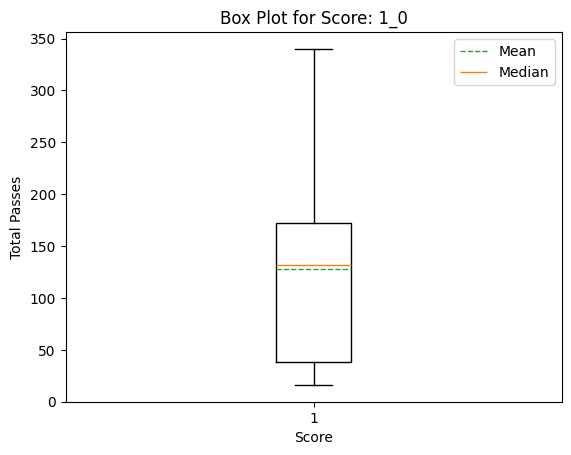

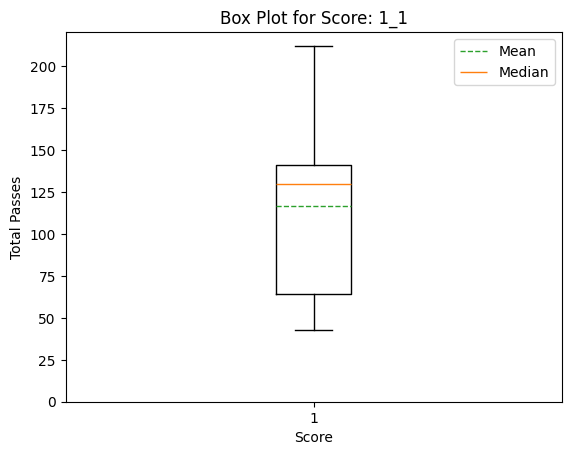

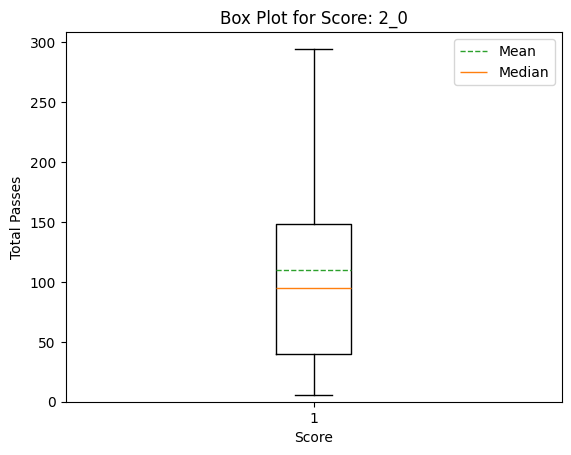

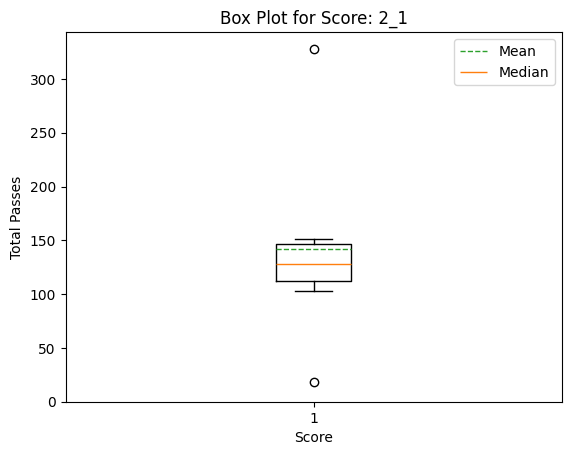

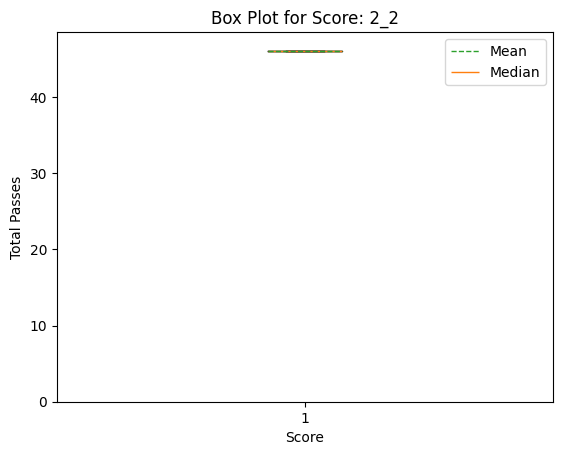

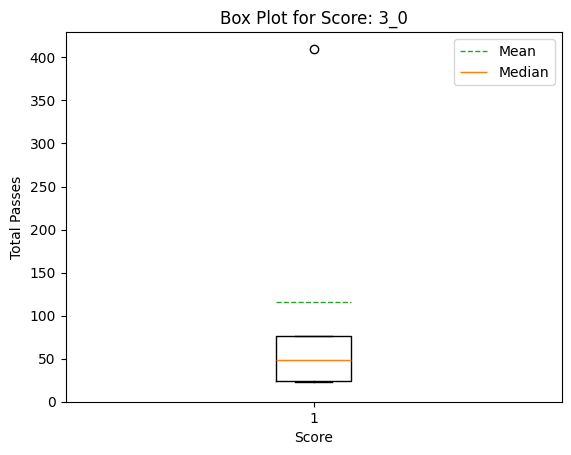

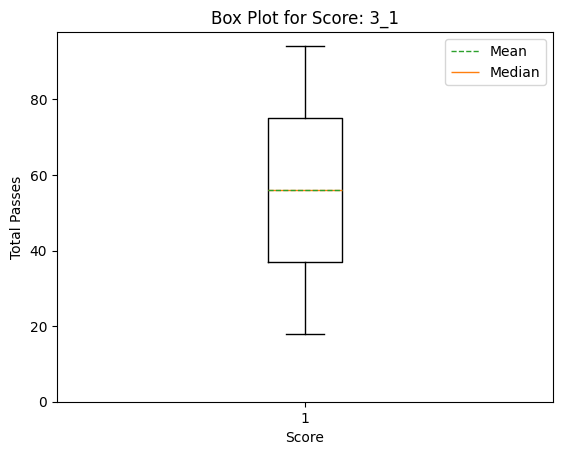

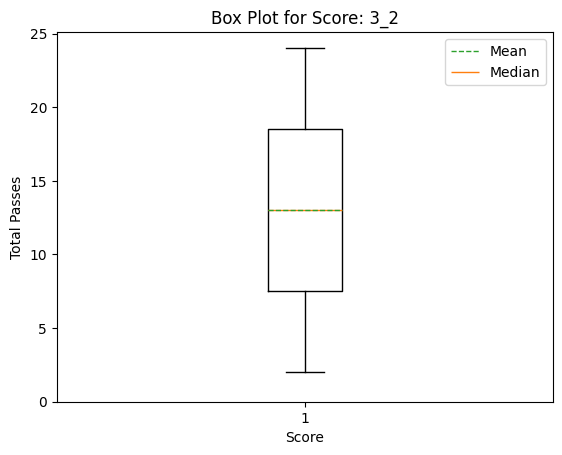

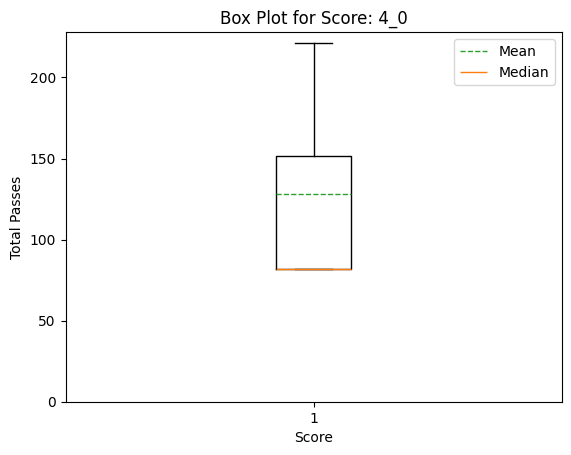

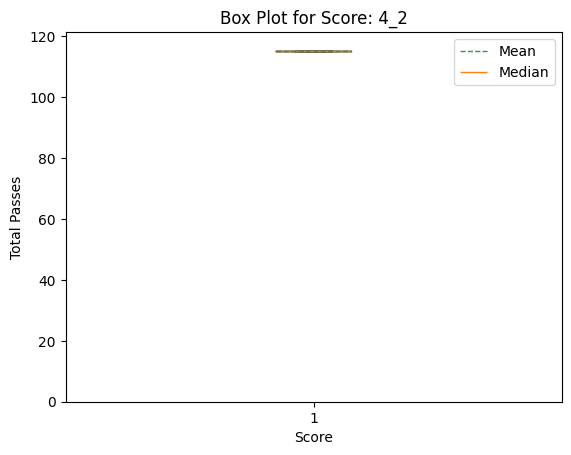

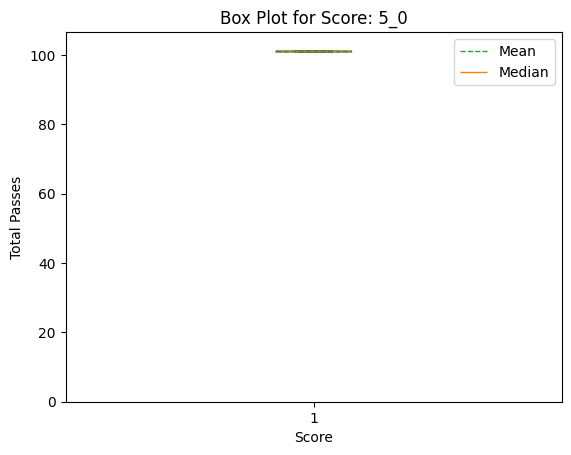

In [200]:
plotBoxPlotForEachScore(goalsArsenal, uniqueArsenalScores)

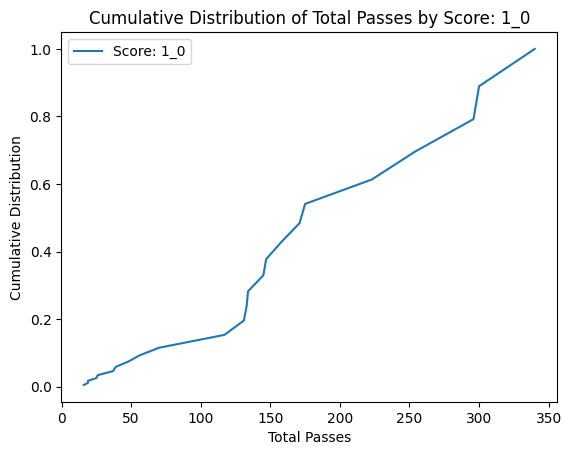

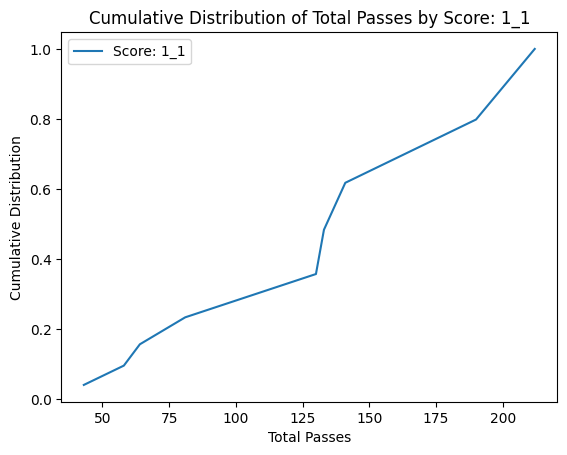

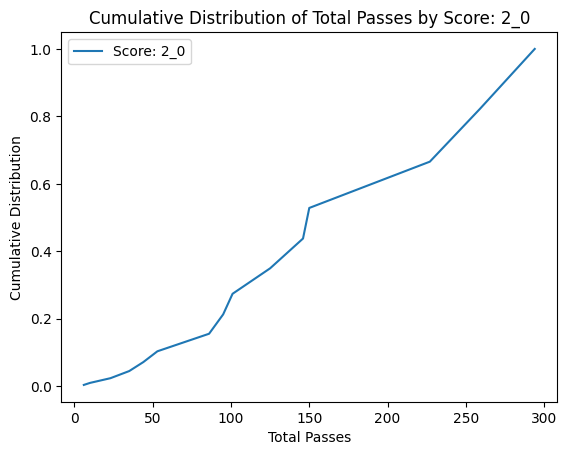

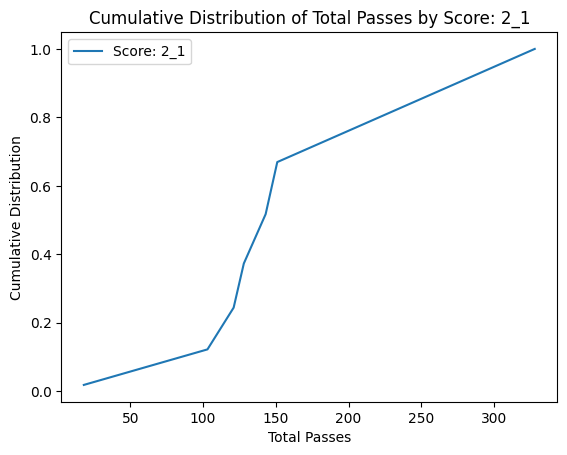

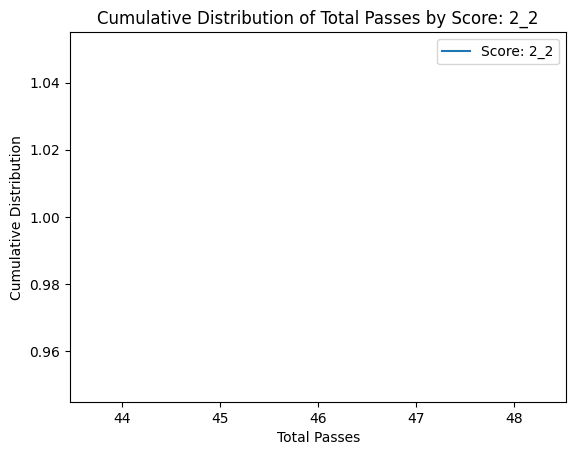

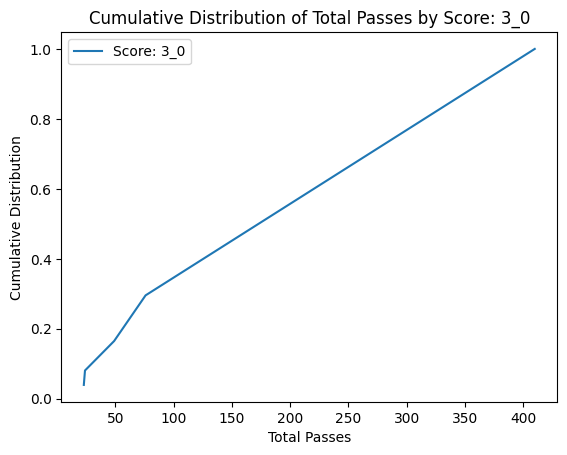

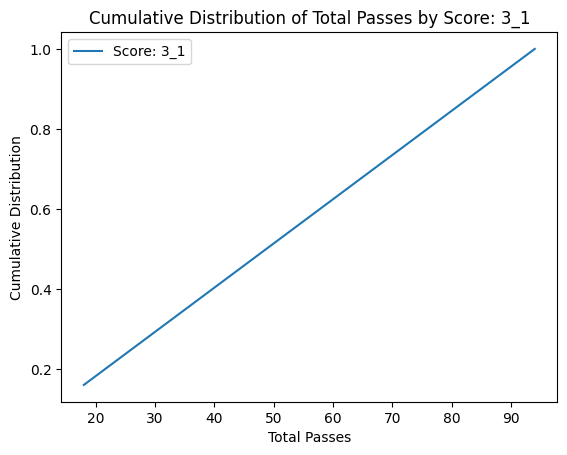

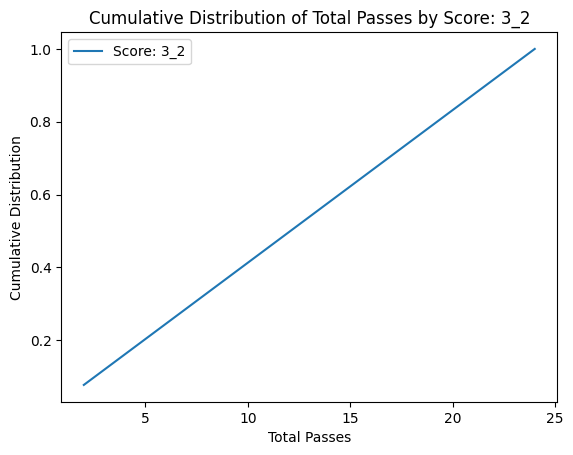

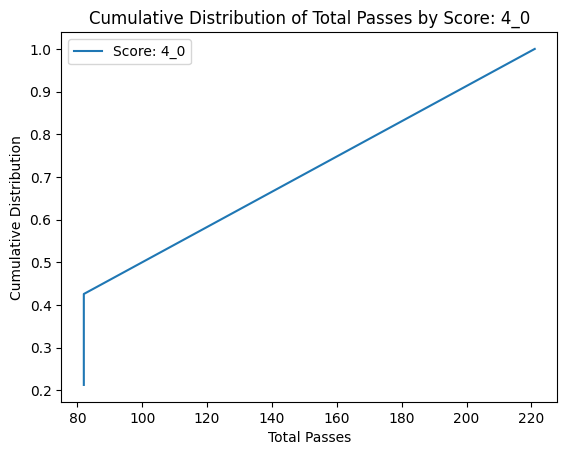

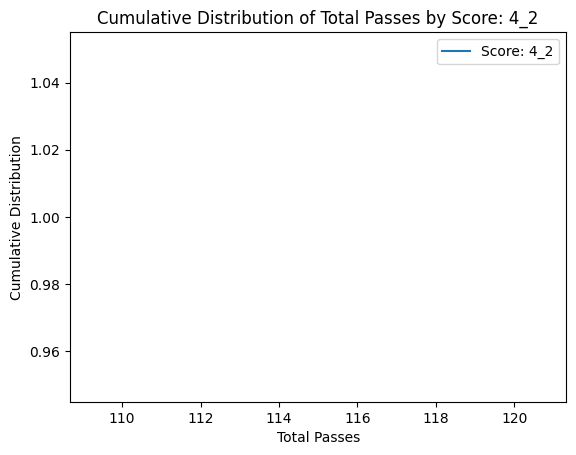

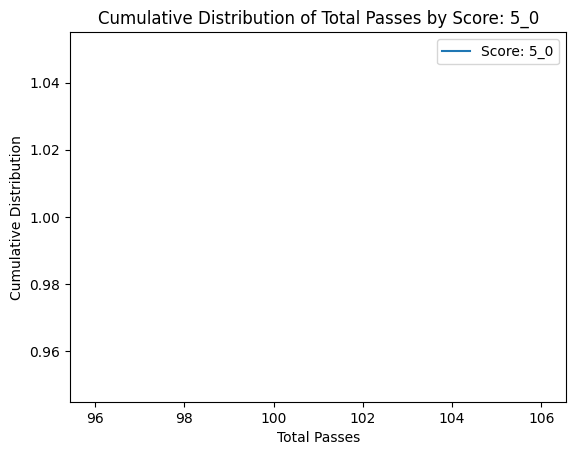

In [183]:
plotCumulativeDistributionForEachScore(goalsArsenal, uniqueArsenalScores)

Barcelona

In [184]:
goalsBarcelona = filterTeam(metadataBarcelona, "Barcelona")

In [185]:
groupedDataTableBarcelona = aggregateStatistics(goalsBarcelona)

In [186]:

print(tabulate(groupedDataTableBarcelona, headers='keys', tablefmt='psql'))

+----+---------+------------------------+---------------+--------------+-------------------+---------------+--------------------+
|    |   Score |   totalNumberOfMatches |   totalPasses |   meanPasses |   deviationPasses |   meanMinutes |   deviationMinutes |
|----+---------+------------------------+---------------+--------------+-------------------+---------------+--------------------|
|  0 |     1_0 |                     28 |          6641 |     237.179  |         184.515   |      31.75    |           27.0564  |
|  1 |     1_1 |                      4 |           449 |     112.25   |          45.6609  |      14.75    |            2.62996 |
|  2 |     1_2 |                      1 |            63 |      63      |         nan       |      10       |          nan       |
|  3 |     2_0 |                     18 |          3306 |     183.667  |         183.196   |      23.8333  |           22.7007  |
|  4 |     2_1 |                      6 |           349 |      58.1667 |          51.9246 

In [187]:
uniqueBarcelonaScores = getUniqueScores(groupedDataTableBarcelona)

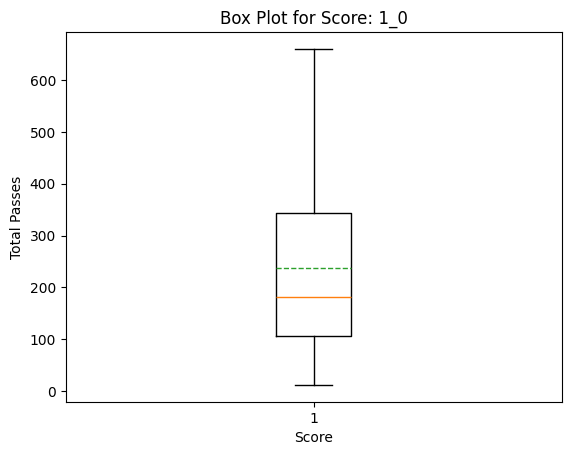

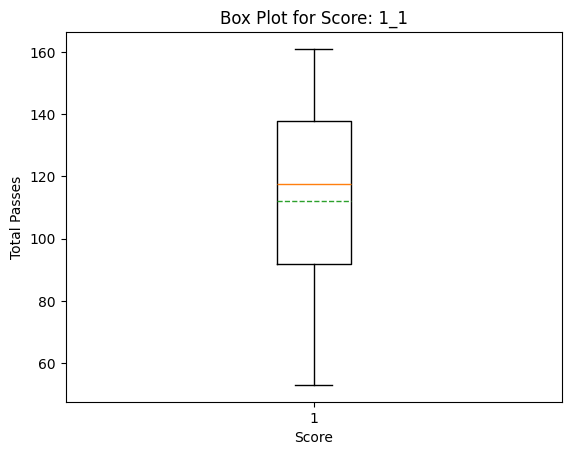

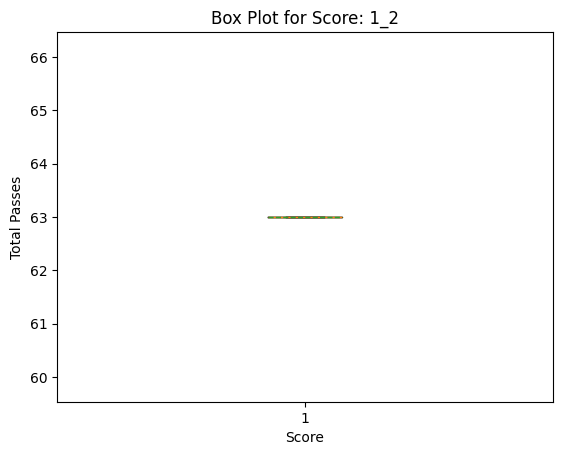

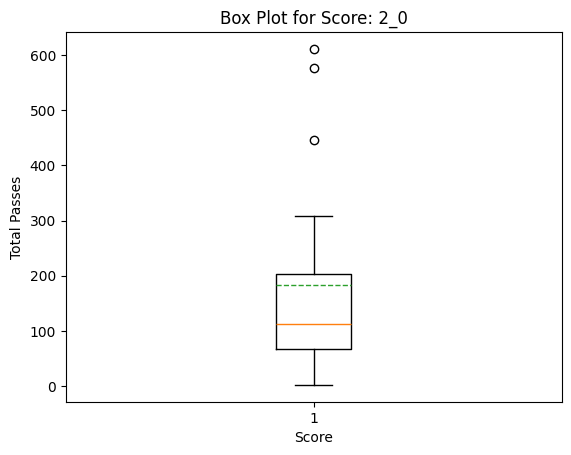

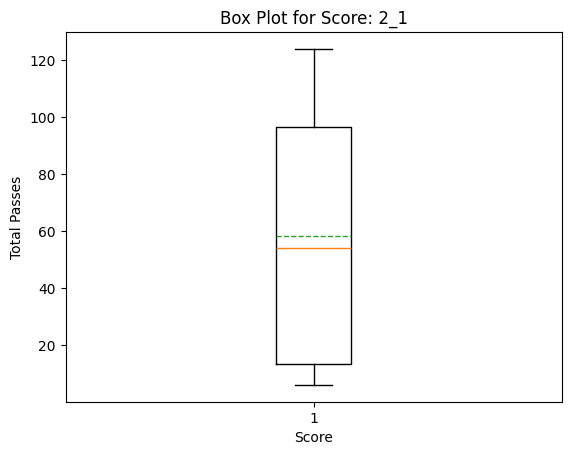

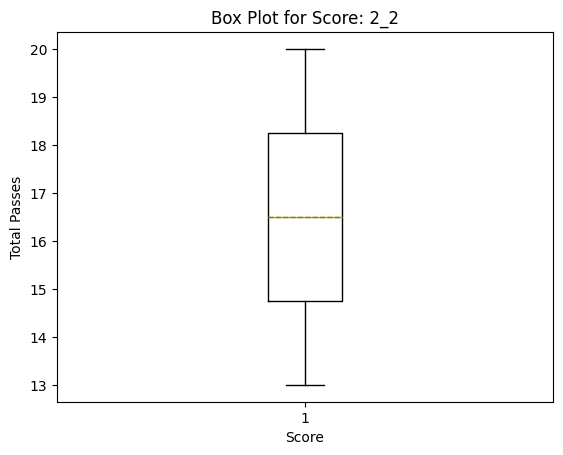

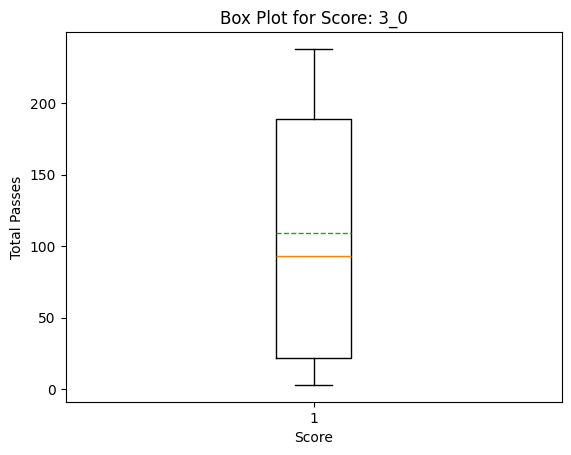

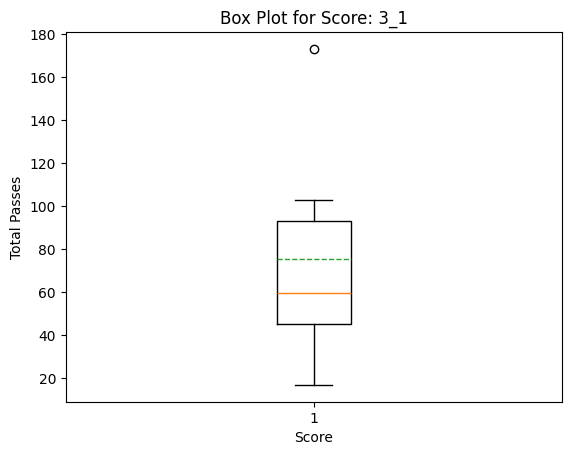

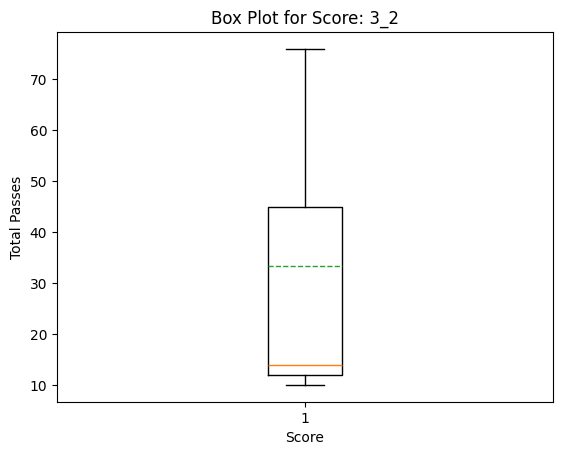

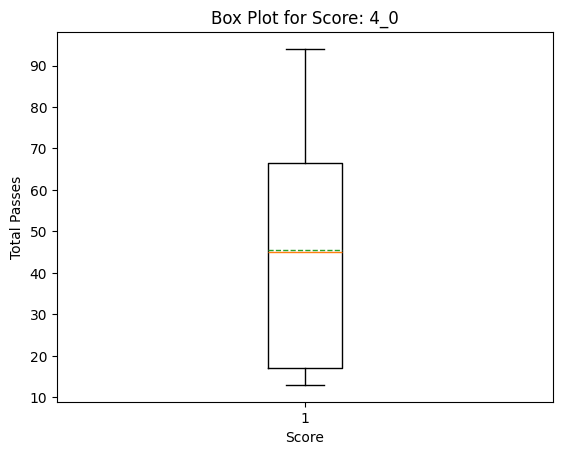

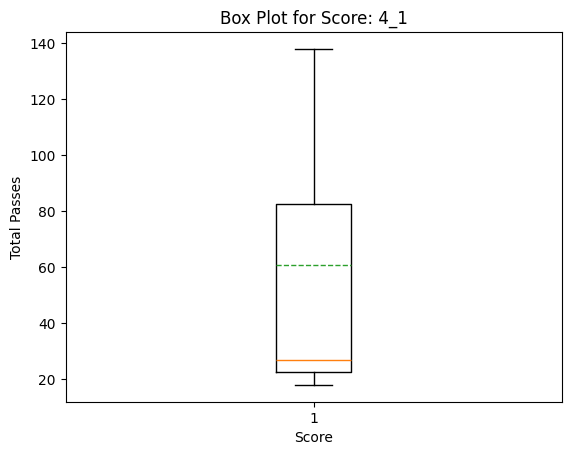

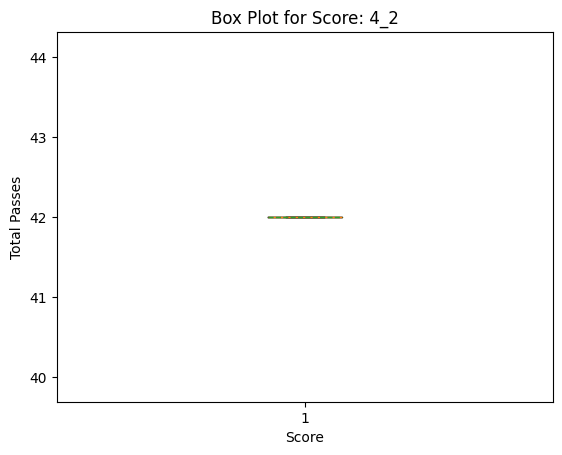

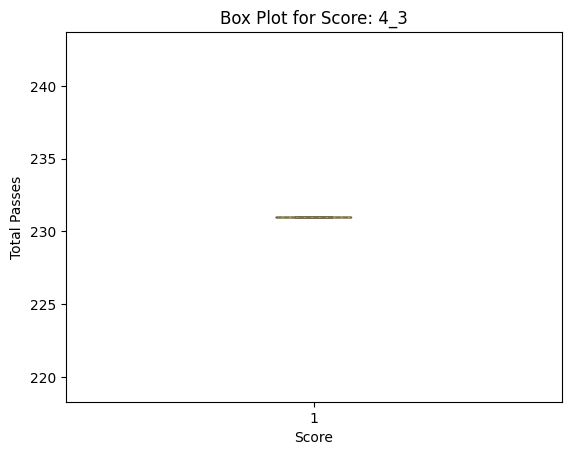

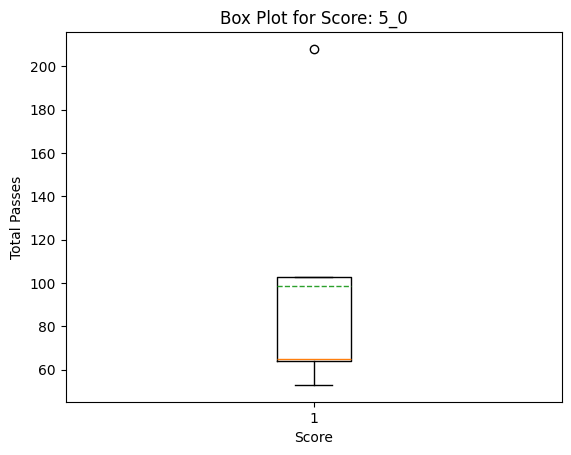

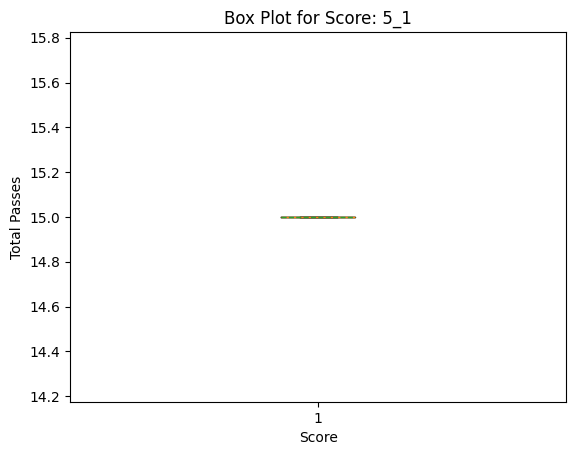

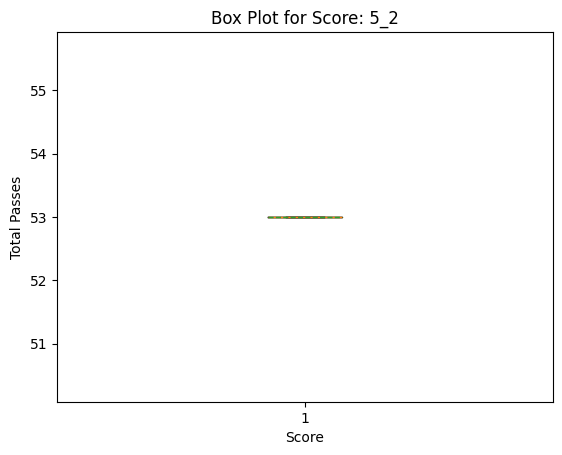

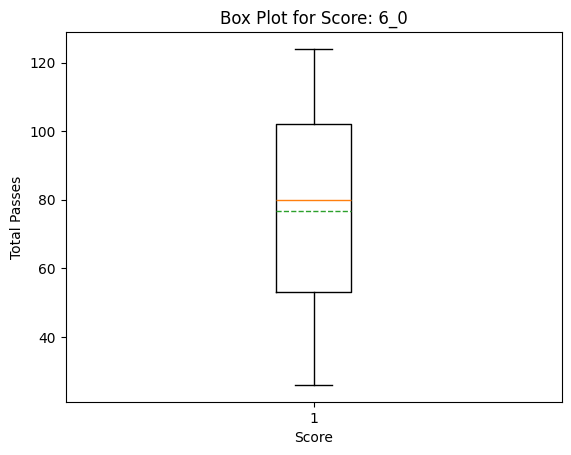

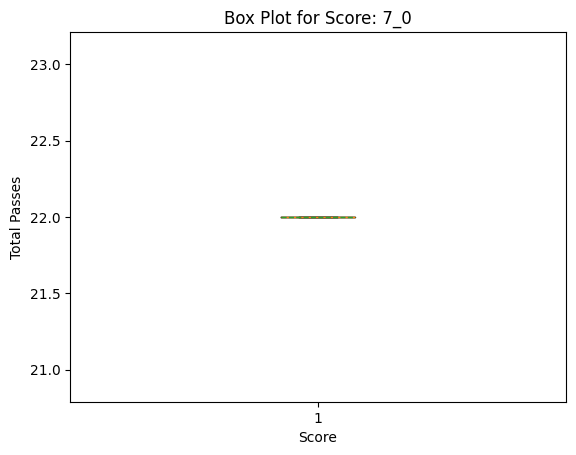

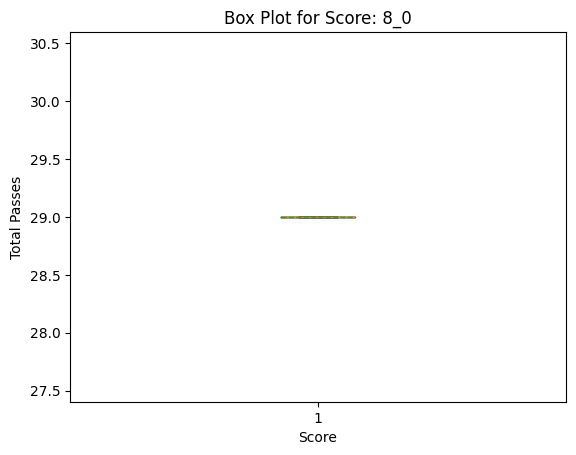

In [188]:
plotBoxPlotForEachScore(goalsBarcelona, uniqueBarcelonaScores)

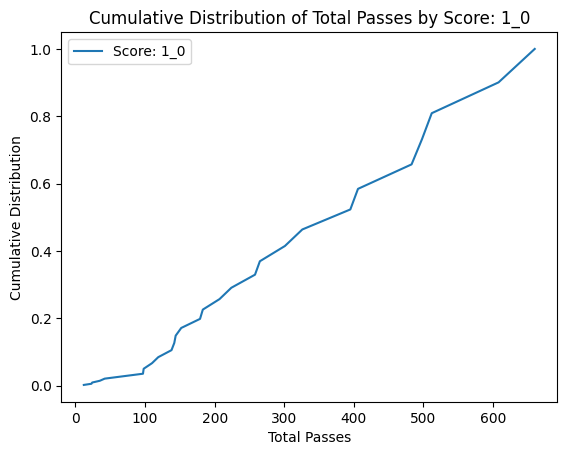

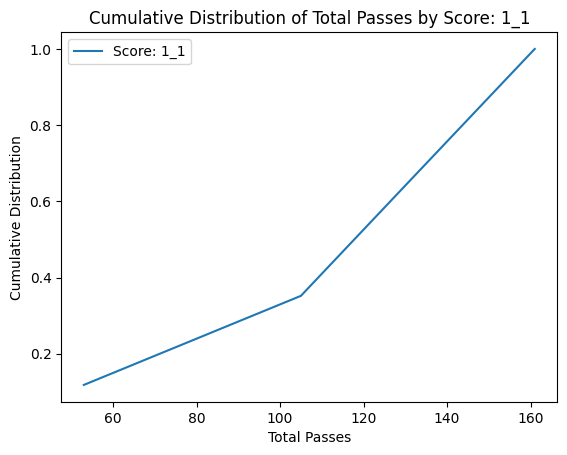

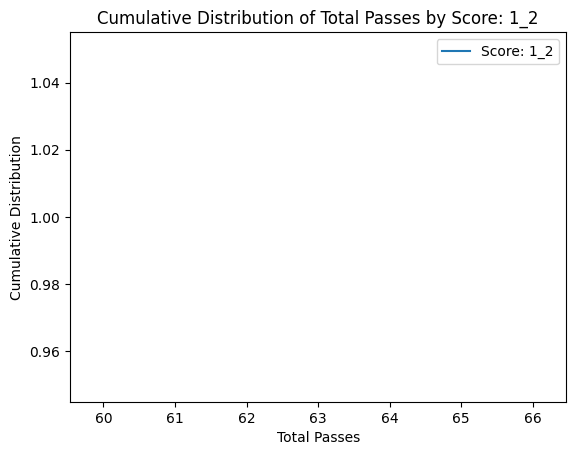

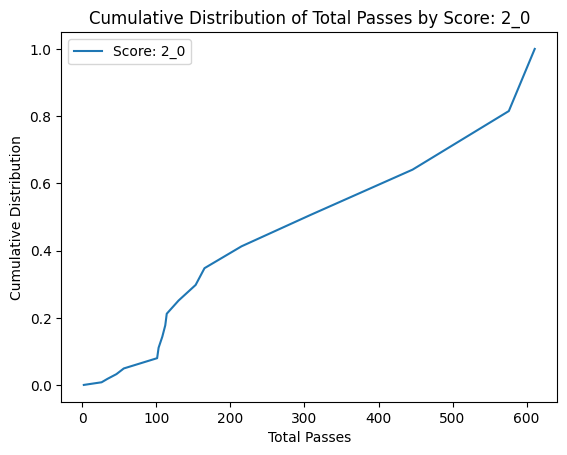

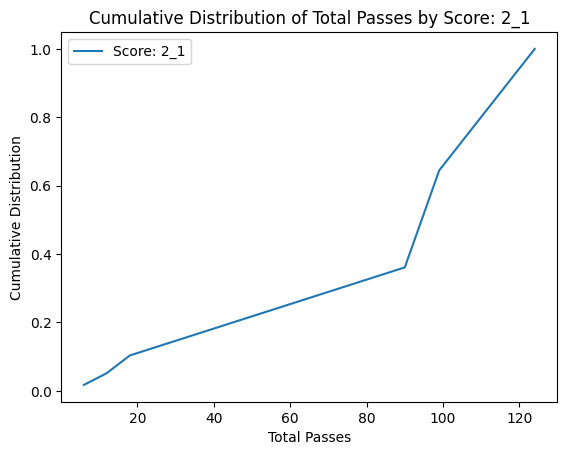

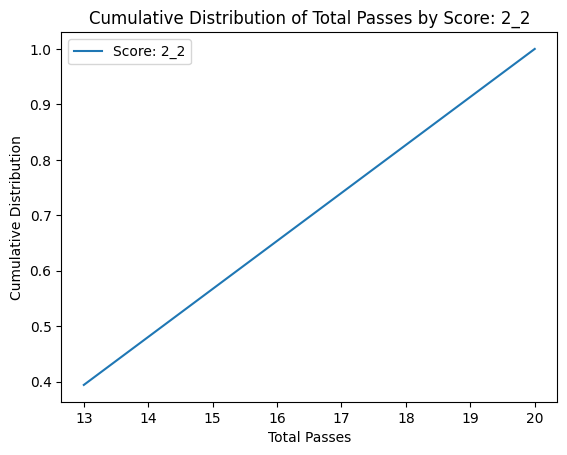

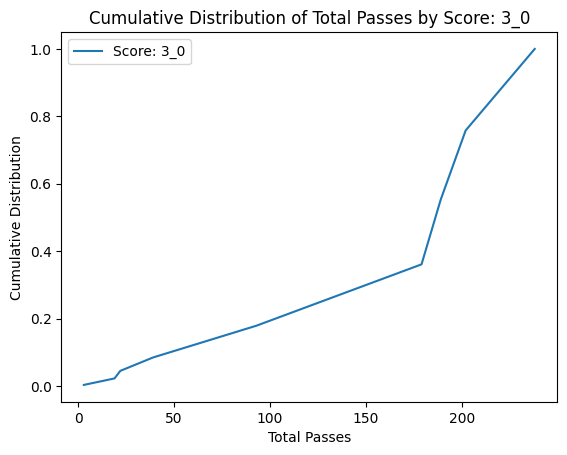

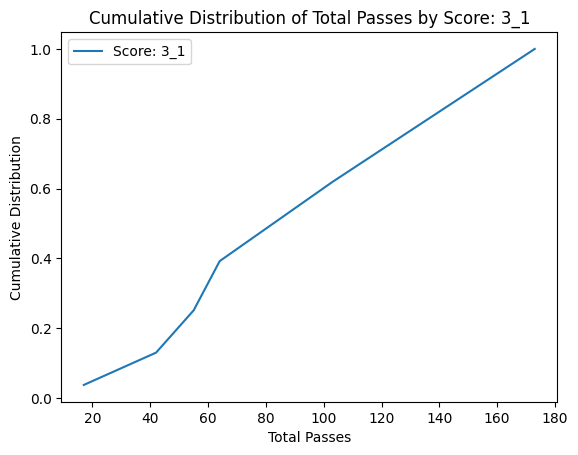

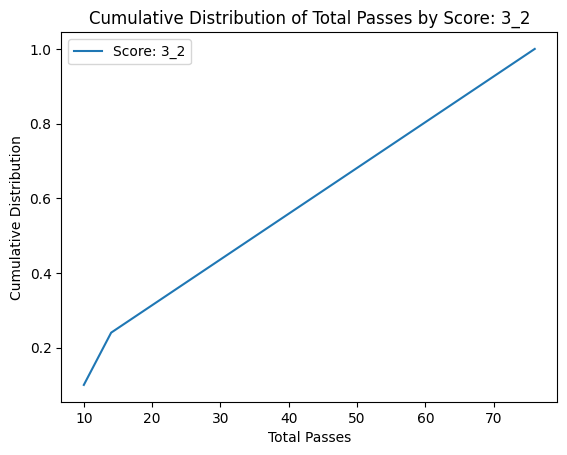

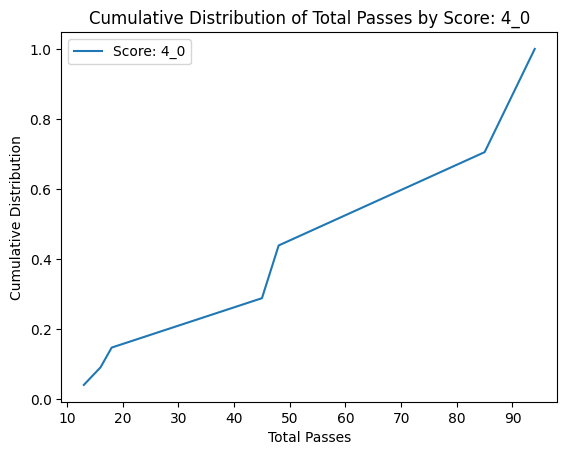

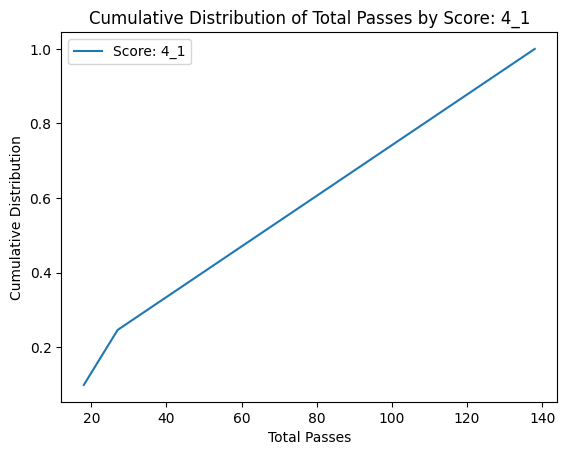

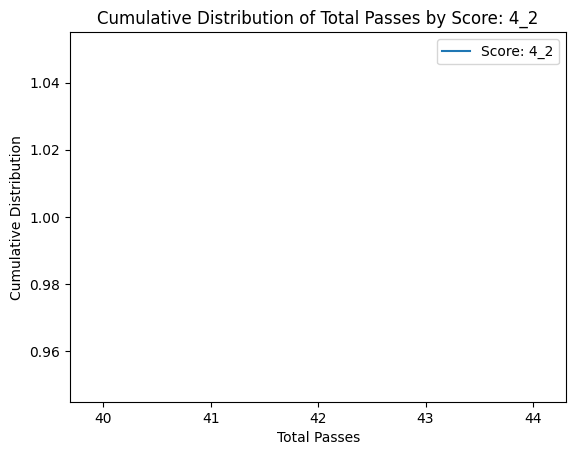

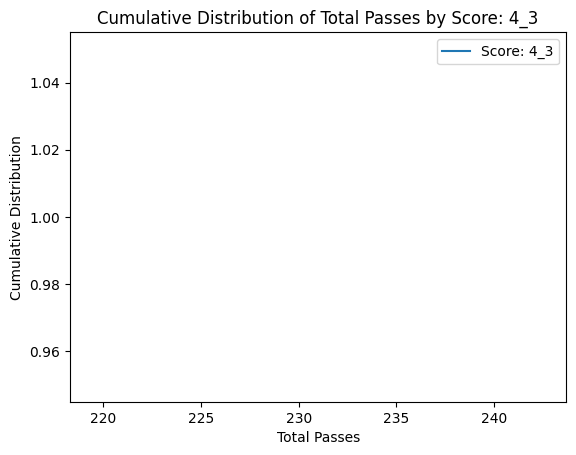

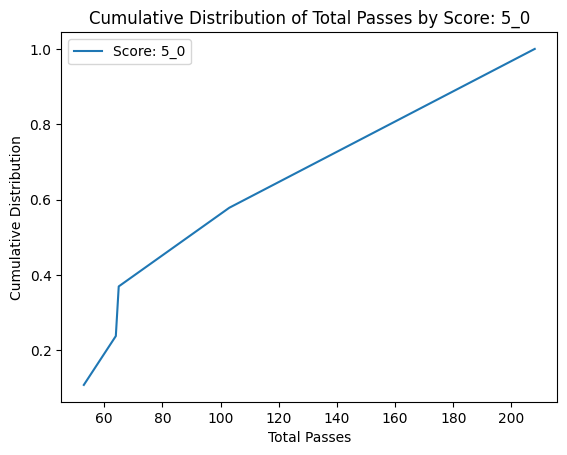

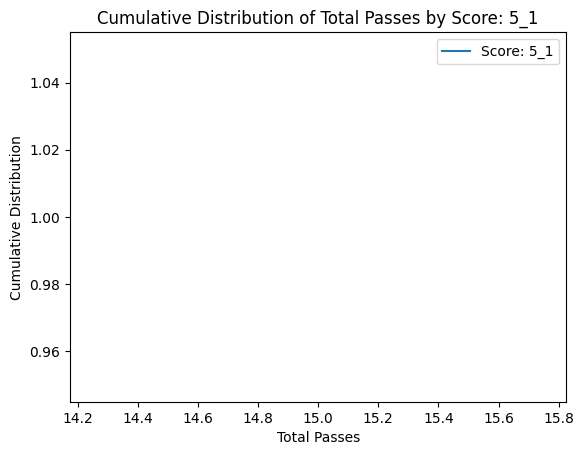

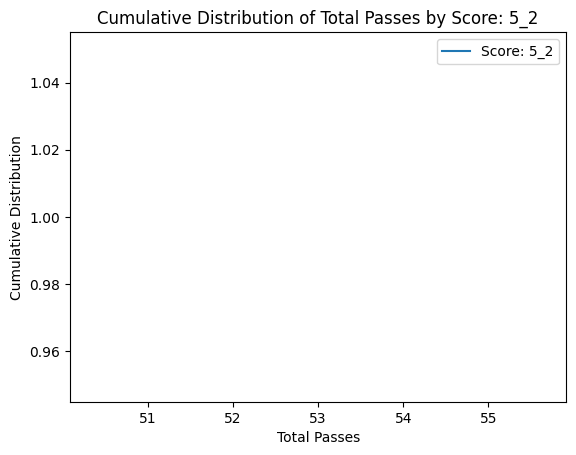

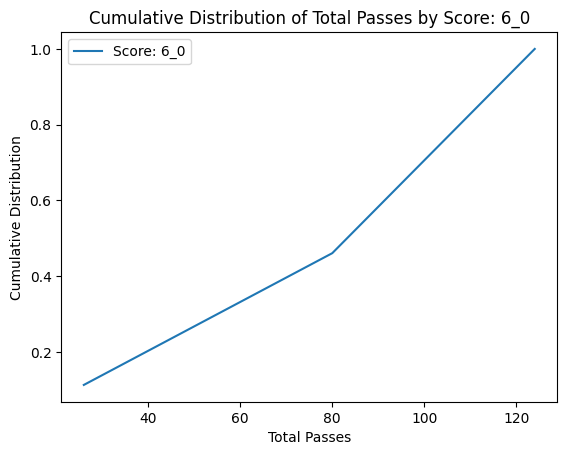

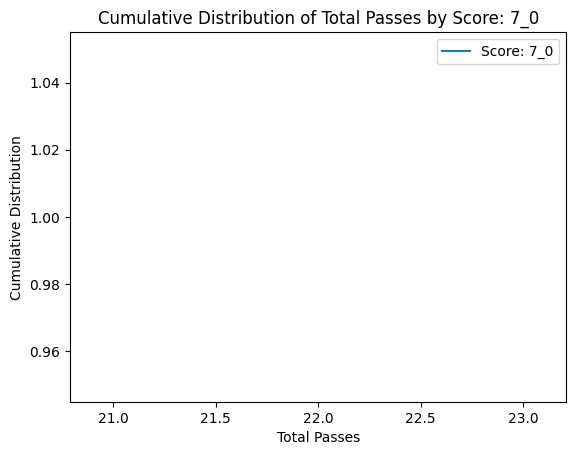

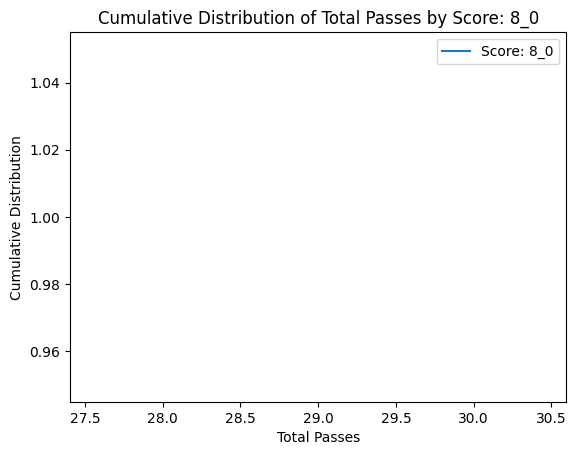

In [189]:
plotCumulativeDistributionForEachScore(goalsBarcelona, uniqueBarcelonaScores)